<a href="https://colab.research.google.com/github/tmedeirosb/modelo_ifrn/blob/master/EDA_EAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import os pacotes utilizados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set()
import scipy.stats as stats

%matplotlib inline

#exibindo todas as colunas
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
import os
os.listdir('/content/drive/My Drive/Colab Notebooks/EAD/')

['PDI  Relatorio Processos Seletivos.xls',
 'PDI_Lista_de_alunos.xls',
 'PDI Professores.xls']

In [11]:
print("Alunos")
dados = pd.read_excel('/content/drive/My Drive/Colab Notebooks/EAD/PDI_Lista_de_alunos.xls')
dados_alunos = dados.copy()
print(dados_alunos.head(3))

print("Professores")
dados = pd.read_excel('/content/drive/My Drive/Colab Notebooks/EAD/PDI Professores.xls')
dados_professores = dados.copy()
print(dados_professores.head(3))

print("Processos")
dados = pd.read_excel('/content/drive/My Drive/Colab Notebooks/EAD/PDI  Relatorio Processos Seletivos.xls')
dados_processos = dados.copy()
print(dados_processos.head(3))

Alunos
   #        Matrícula                          Nome  \
0  1   20132156030474    Abdenor Bezerra dos Santos   
1  2  201421510470141  Abdon Silva Ribeiro da Cunha   
2  3   20172153040103        Abel Gomes de Oliveira   

   Ano Letivo de Previsão de Conclusão  Ano de Ingresso             CPF  \
0                                 2017             2013  064.451.394-26   
1                                 2014             2014  058.591.254-88   
2                                 2020             2017  707.931.234-53   

  Campus Convênio                                              Curso  \
0    EAD      UAB  15603 - Licenciatura em Letras Espanhol EaD - ...   
1    EAD        -  151047 - FIC+ Formação em Educação a Distância...   
2    EAD      UAB  15304 - Tecnologia em Gestão Ambiental EaD [20...   

  Data de Conclusão de Curso Data de Integralização    Data de Matrícula  \
0                          -                      -  27/06/2013 00:00:00   
1                          -  

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


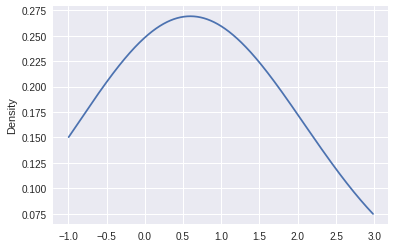

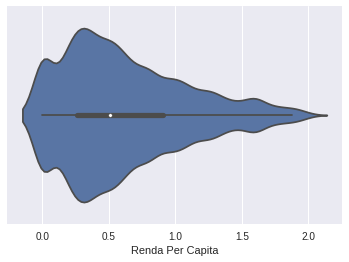

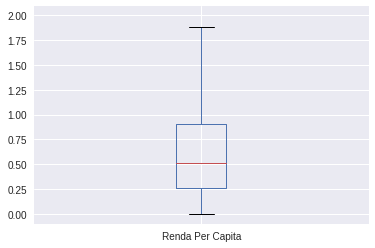

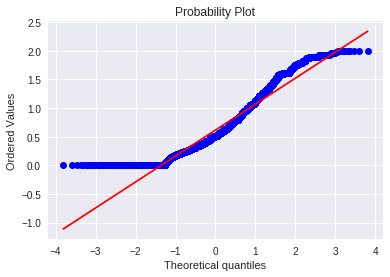

In [54]:
dados_alunos_tun = dados_alunos.copy()
dados_alunos_tun["Renda Per Capita"] = dados_alunos_tun["Renda Per Capita"].replace("-", np.nan)
dados_alunos_tun["Renda Per Capita"] = dados_alunos_tun["Renda Per Capita"].str.replace("\.", "", case = False) 
dados_alunos_tun["Renda Per Capita"] = dados_alunos_tun["Renda Per Capita"].str.replace(",", ".", case = False)
dados_alunos_tun["Renda Per Capita"] = dados_alunos_tun["Renda Per Capita"].astype(float)
#print(dados_alunos_tun["Renda Per Capita"])

media = dados_alunos_tun['Renda Per Capita'].median()
desvio = dados_alunos_tun['Renda Per Capita'].std()
#dados_alunos_tun = dados_alunos_tun[dados_alunos_tun["Renda Per Capita"] < (media + 2*desvio)]
dados_alunos_tun = dados_alunos_tun[dados_alunos_tun["Renda Per Capita"] < 2]
#print(df_tmp.shape)

dados_alunos_tun["Renda Per Capita"].plot.kde(bw_method=3)

fig = plt.figure()
sns.violinplot(dados_alunos_tun["Renda Per Capita"].dropna())

fig = plt.figure()
dados_alunos_tun['Renda Per Capita'].dropna().plot(kind='box')

fig = plt.figure()
o, res = stats.probplot(dados_alunos_tun["Renda Per Capita"].dropna(), plot=plt)  

In [0]:
#g = sns.FacetGrid(dados_alunos_tun, col="Tipo de Escola de Origem",  row="Curso")
#g = g.map(sns.kdeplot, "Renda Per Capita")


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


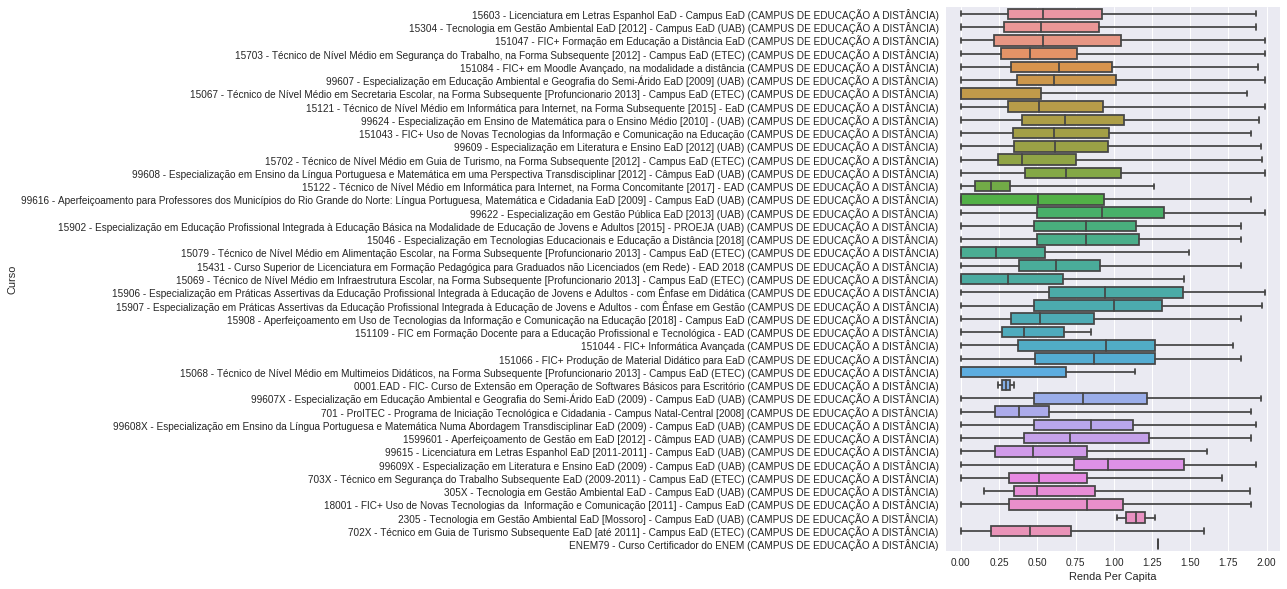

In [60]:
f, ax = plt.subplots(figsize=(6, 10))
sns.boxplot(x="Renda Per Capita", y="Curso", data=dados_alunos_tun, whis="range")

In [66]:
dados_alunos_tun.groupby(['Situação no Curso', 'Curso']).aggregate([np.size]).unstack()

#  \
                                                                                                                                               size   
Curso                           0001.EAD - FIC- Curso de Extensão em Operação de Softwares Básicos para Escritório (CAMPUS DE EDUCAÇÃO A DISTÂNCIA)   
Situação no Curso                                                                                                                                     
Aguardando ENADE                                                               NaN                                                                    
Cancelado                                                                      NaN                                                                    
Cancelamento Compulsório                                                       NaN                                                                    
Concludente                                                                    NaN                                                                    
Concluído                                                                      1.0                                                                    
Evasão                                                                         NaN                                                                    
Formado                                                                        NaN                                                                    
Jubilado                                                                       NaN                                                                    
Matriculado                                                                    NaN                                                                    
Matrícula Vínculo Institucional                                                NaN                                                                    
Não concluído                                                                  1.0                                                                    
Trancado Voluntariamente                                                       NaN                                                                    
Transferido Externo                                                            NaN                                                                    
Transferido Interno                                                            NaN                                                                    

                                                                                                                                                   \
                                                                                                                                                    
Curso                           15046 - Especialização em Tecnologias Educacionais e Educação a Distância [2018] (CAMPUS DE EDUCAÇÃO A DISTÂNCIA)   
Situação no Curso                                                                                                                                   
Aguardando ENADE                                                               NaN                                                                  
Cancelado                                                                      2.0                                                                  
Cancelamento Compulsório                                                       NaN                                                                  
Concludente                                                                    NaN                                                                  
Concluído                                                                      NaN                                                                  
Evasão                                                                         NaN    

   #       Matrícula                              Nome CH Sala de Aula  \
0  0         1895370  Abigail Noadia Barbalho da Silva               -   
1  1  792.047.084-68      Adda Kesia Barbalho da Silva               -   
2  2  011.722.184-80            Adelita Alves de Souza               -   

  CH Total Campus                                              Cargo  \
0        -    EAD  PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...   
1        -    EAD                                                  -   
2        -    EAD                                                  -   

  Disciplina de Ingresso  Quantidade de Alunos em Diários     Titulação  
0               Didática                              211        Mestra  
1                      -                               66  Especialista  
2                      -                                0      Graduada  


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


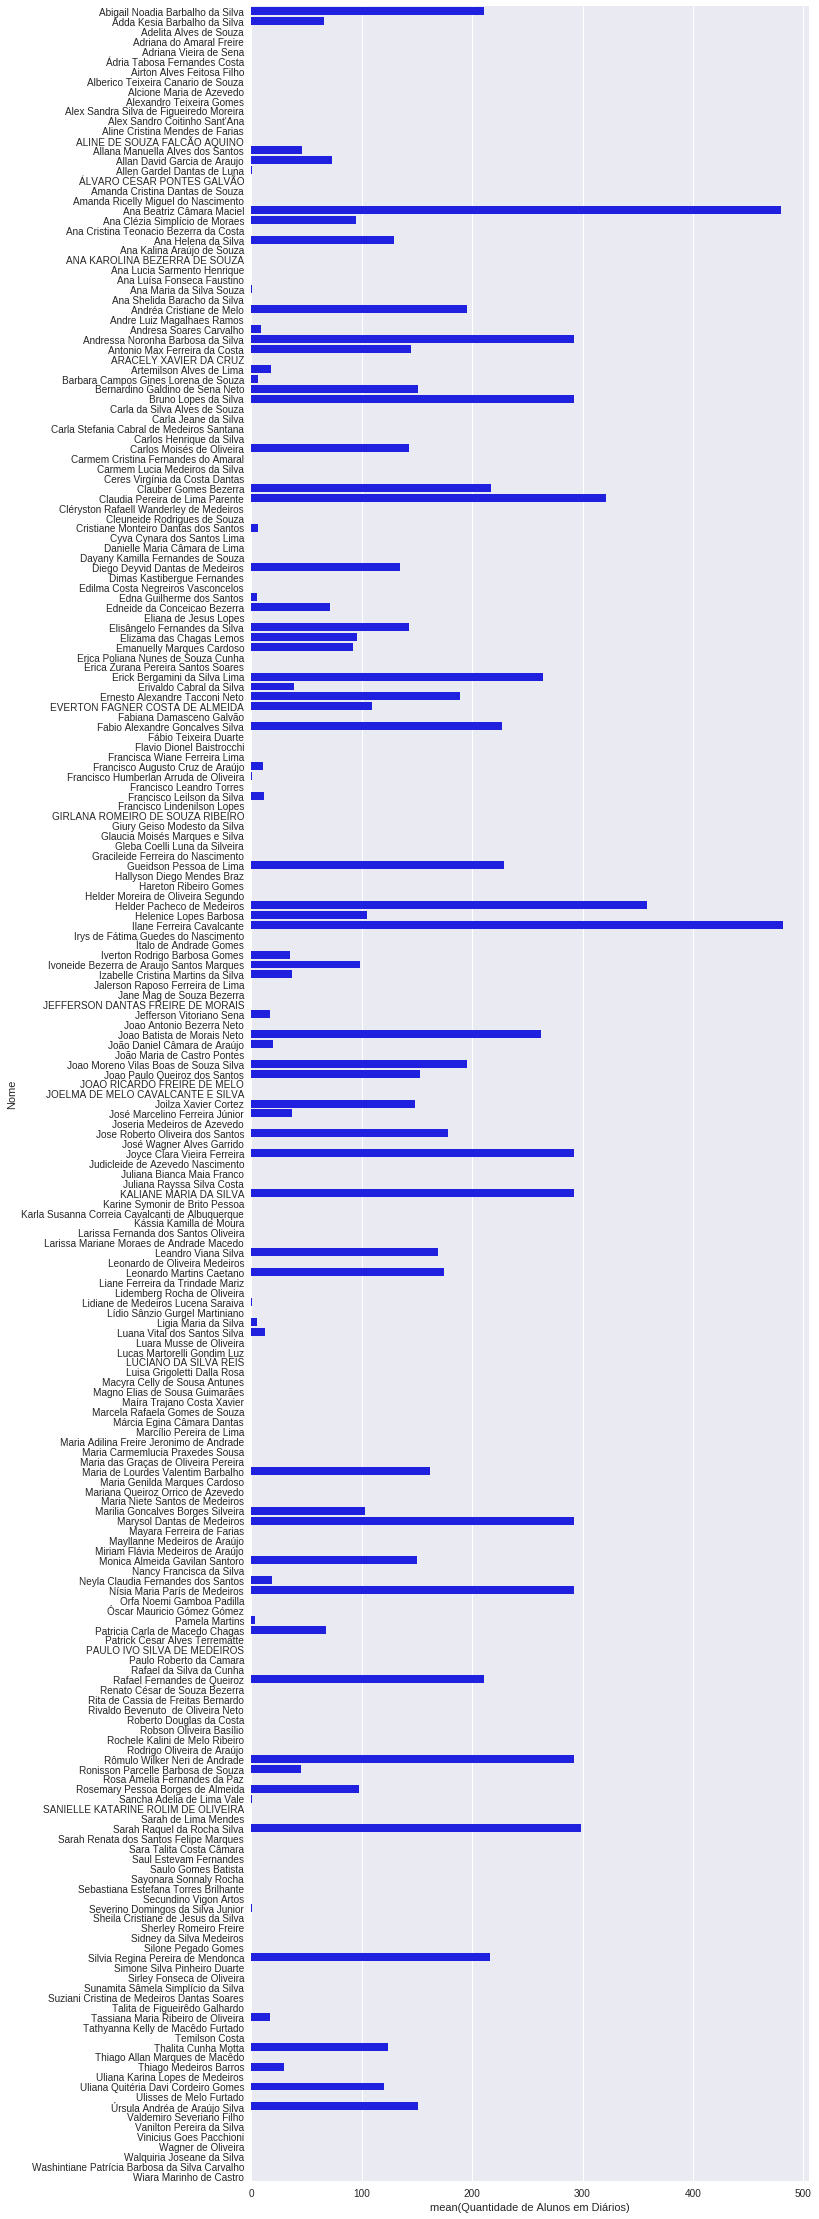

In [75]:
print(dados_professores.head(3))

f, ax = plt.subplots(figsize=(10, 40))
#dados_professores["Quantidade de Alunos em Diários"].hist(x="Nome")
sns.barplot(x="Quantidade de Alunos em Diários", y="Nome", data=dados_professores,
            label="Nome", color="b")
